<a href="https://colab.research.google.com/github/lucasresck/FGV-EMAp/blob/master/Introduction%20to%20Computer%20Graphics/Assignments/A1%20assignment/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A1 assignment for Introduction to Computer Graphics

This is the Jupyter notebook for implementation of the image processing techniques. There will be functions for techniques of reducing image noise and its testing. You can get the assignment report at the respective folder in this GitHub repository:

https://github.com/lucasresck/FGV-EMAp/tree/master/Introduction%20to%20Computer%20Graphics/Assignments/A1%20assignment

In [0]:
import numpy as np
import cv2
import random
import time
from google.colab.patches import cv2_imshow  #Google Colab disabled imshow method from cv2 package, but implemented its own method

In [0]:
def medianFilter(img, height=0, width=0, r=1, rgb=False):
    if height == 0:
        height = len(img)
    if width == 0:
        width = int(np.floor(height / len(img) * len(img[0])))
    img = cv2.resize(img, (width, height))
    
    if rgb:
        red = img[:,:,0]
        green = img[:,:,1]
        blue = img[:,:,2]
        red2 = np.zeros((height, width))
        green2 = np.zeros((height, width))
        blue2 = np.zeros((height, width))
        img2 = np.zeros((height, width, 3))
        for h in range(0, height):
            for w in range(0, width):
                red_neighbours = red[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                img2[h][w][0] = np.median(red_neighbours)
                green_neighbours = green[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                img2[h][w][1] = np.median(green_neighbours)
                blue_neighbours = blue[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                img2[h][w][2] = np.median(blue_neighbours)
        return img2
    
    img2 = np.zeros((height, width))
    for h in range(0, height):
        for w in range(0, width):
            neighbours = img[np.maximum(0, h-r):np.minimum(h+r+1, height-1), np.maximum(0, w-r):np.minimum(w+r+1, width-1)]
            img2[h][w] = np.median(neighbours)
            
    return img2

def meanFilter(img, height=0, width=0, r=1, rgb=False):
    if height == 0:
        height = len(img)
    if width == 0:
        width = int(np.floor(height / len(img) * len(img[0])))
    img = cv2.resize(img, (width, height))
    
    if rgb:
        red = img[:,:,0]
        green = img[:,:,1]
        blue = img[:,:,2]
        red2 = np.zeros((height, width))
        green2 = np.zeros((height, width))
        blue2 = np.zeros((height, width))
        img2 = np.zeros((height, width, 3))
        for h in range(0, height):
            for w in range(0, width):
                red_neighbours = red[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                img2[h][w][0] = np.mean(red_neighbours)
                green_neighbours = green[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                img2[h][w][1] = np.mean(green_neighbours)
                blue_neighbours = blue[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                img2[h][w][2] = np.mean(blue_neighbours)
        return img2
    
    img2 = np.zeros((height, width))
    for h in range(0, height):
        for w in range(0, width):
            neighbours = img[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
            img2[h][w] = np.mean(neighbours)
            
    return img2

def gaussian(x, mu, sig):
    return np.exp(-0.5*((x - mu)/sig)**2.)/(sig*np.sqrt(2.*np.pi))

def gaussianBlur(img, sig, height=0, width=0, rgb=False):
    if height == 0:
        height = len(img)
    if width == 0:
        width = int(np.floor(height / len(img) * len(img[0])))
    img = cv2.resize(img, (width, height))
    
    r = int(3*np.ceil(sig))
    kernel = np.zeros(2*r + 1)
    N = len(kernel)
    for n in range(N):
        x = (n + 0.5) - N/2 
        kernel[n] = gaussian(x,0,sig)
    kernel = kernel/np.sum(kernel)    
    
    if rgb:
        red = img[:,:,0]
        green = img[:,:,1]
        blue = img[:,:,2]
        red2 = np.zeros((height, width))
        green2 = np.zeros((height, width))
        blue2 = np.zeros((height, width))
        for h in range(0, height):
            for w in range(0, width):
                kernel2 = kernel
                red_neighbours = red[np.maximum(0, h-r):1+np.minimum(h+r, height-1), w]
                green_neighbours = green[np.maximum(0, h-r):1+np.minimum(h+r, height-1), w]
                blue_neighbours = blue[np.maximum(0, h-r):1+np.minimum(h+r, height-1), w]
                if len(red_neighbours) < N:
                    if h-r < 0:
                        kernel2 = kernel2[r-h:]
                    else: #h+r > height-1
                        kernel2 = kernel2[:N-(h+r-(height-1))]
                    kernel2 = kernel2/np.sum(kernel2)
                red2[h][w] = np.dot(red_neighbours, kernel2)
                green2[h][w] = np.dot(green_neighbours, kernel2)
                blue2[h][w] = np.dot(blue_neighbours, kernel2)
                
        img2 = np.zeros((height, width, 3))
        for h in range(0, height):
            for w in range(0, width):
                kernel2 = kernel
                red_neighbours = red2[h, np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                green_neighbours = green2[h, np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                blue_neighbours = blue2[h, np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                if len(red_neighbours) < N:
                    if w-r < 0:
                        kernel2 = kernel2[r-w:]
                    else: #w+r > width-1
                        kernel2 = kernel2[:N-(w+r-(width-1))]
                    kernel2 = kernel2/np.sum(kernel2)
                img2[h][w][0] = np.dot(red_neighbours, kernel2)
                img2[h][w][1] = np.dot(green_neighbours, kernel2)
                img2[h][w][2] = np.dot(blue_neighbours, kernel2)
        
        return img2

    img2 = np.zeros((height, width))
    for h in range(0, height):
        for w in range(0, width):
            kernel2 = kernel
            neighbours = img[np.maximum(0, h-r):1+np.minimum(h+r, height-1), w]
            if len(neighbours) < N:
                if h-r < 0:
                    kernel2 = kernel2[r-h:]
                else: #h+r > height-1
                    kernel2 = kernel2[:N-(h+r-(height-1))]
                kernel2 = kernel2/np.sum(kernel2)
            img2[h][w] = np.dot(neighbours, kernel2)
            
    img3 = np.zeros((height, width))
    for h in range(0, height):
        for w in range(0, width):
            kernel2 = kernel
            neighbours = img2[h, np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
            if len(neighbours) < N:
                if w-r < 0:
                    kernel2 = kernel2[r-w:]
                else: #w+r > width-1
                    kernel2 = kernel2[:N-(w+r-(width-1))]
                kernel2 = kernel2/np.sum(kernel2)
            img3[h][w] = np.dot(neighbours, kernel2)
            
    return img3
    

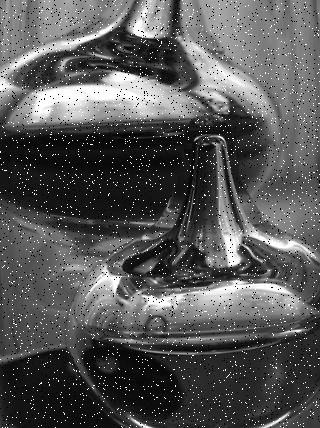

In [0]:
img1 = cv2.imread('/content/Salt-and-pepper noise.png', cv2.IMREAD_UNCHANGED)  # Be aware of path
# Source: https://upload.wikimedia.org/wikipedia/commons/f/f4/Noise_salt_and_pepper.png
cv2_imshow(img1)

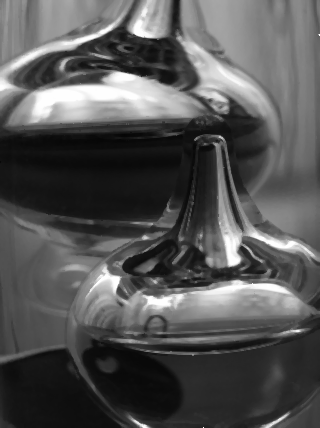

In [0]:
cv2_imshow(medianFilter(img1))

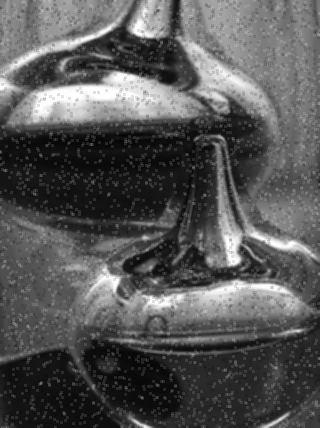

In [0]:
cv2_imshow(meanFilter(img1))

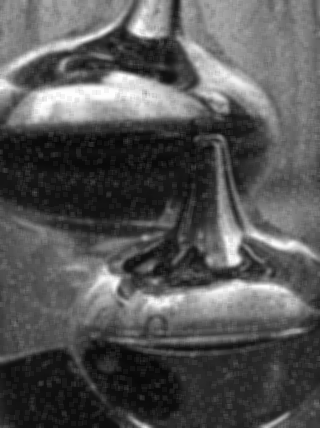

In [0]:
cv2_imshow(meanFilter(img1, r=2))

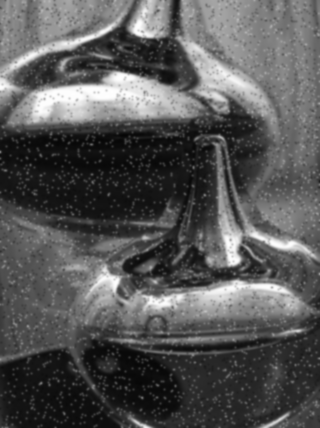

In [0]:
cv2_imshow(gaussianBlur(img1, 1.))

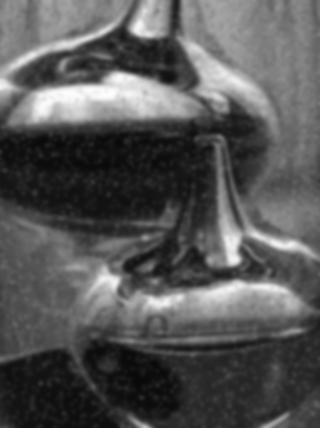

In [0]:
cv2_imshow(gaussianBlur(img1, 2))

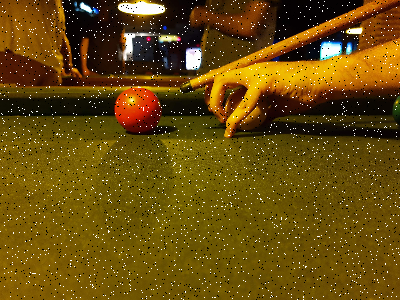

In [0]:
img2 = cv2.imread('/content/Before salt-and-pepper noise.jpg', cv2.IMREAD_UNCHANGED)
img2 = cv2.resize(img2, (400, 300))

# The original image doesn't have noise, so I introduce them

random.seed(time.time())
p = 0.02

for h in range(len(img2)):
    for w in range(len(img2[0])):
        if random.random() < p:
            img2[h][w][0] = 0
            img2[h][w][1] = 0
            img2[h][w][2] = 0
        if random.random() > 1 - p:
            img2[h][w][0] = 255
            img2[h][w][1] = 255
            img2[h][w][2] = 255
            
cv2_imshow(img2)

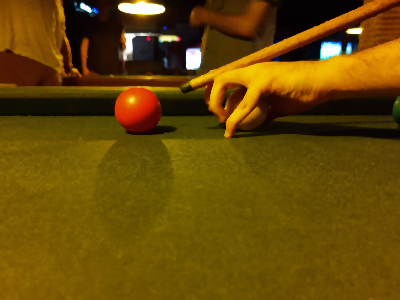

In [0]:
cv2_imshow(medianFilter(img2, rgb=True))

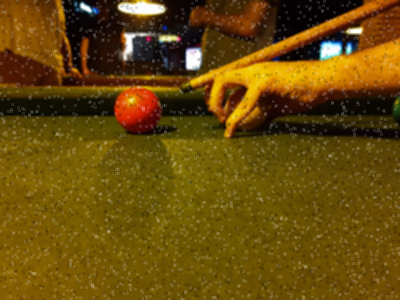

In [0]:
cv2_imshow(meanFilter(img2, rgb=True))

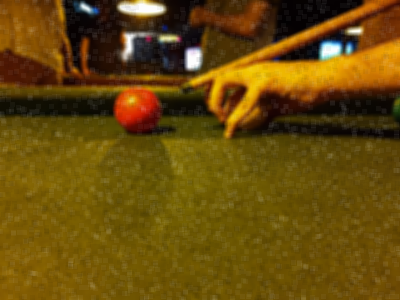

In [0]:
cv2_imshow(meanFilter(img2, rgb=True, r=2))

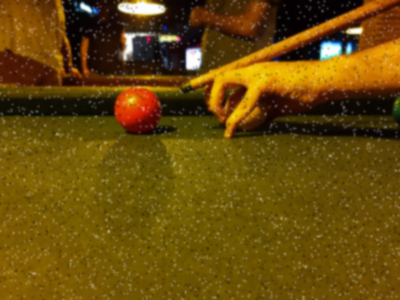

In [0]:
cv2_imshow(gaussianBlur(img2, 1., rgb=True))

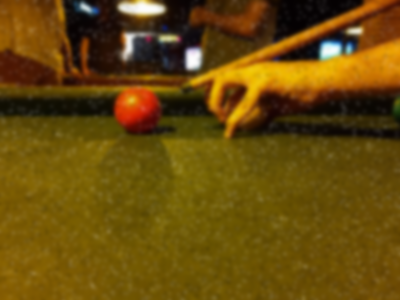

In [0]:
cv2_imshow(gaussianBlur(img2, 2., rgb=True))

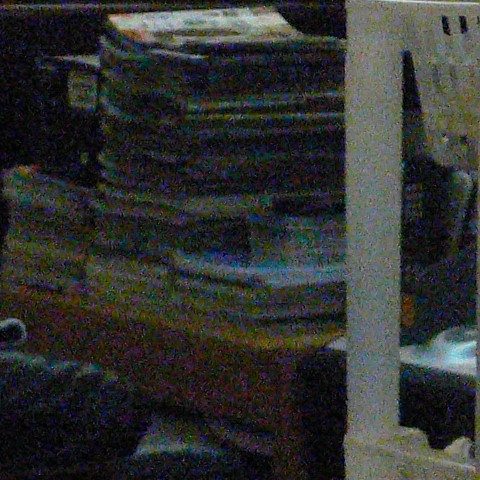

In [0]:
img3 = cv2.imread('/content/High noise.jpg', cv2.IMREAD_UNCHANGED)
# Source: https://upload.wikimedia.org/wikipedia/commons/8/87/Highimgnoise.jpg
cv2_imshow(img3)

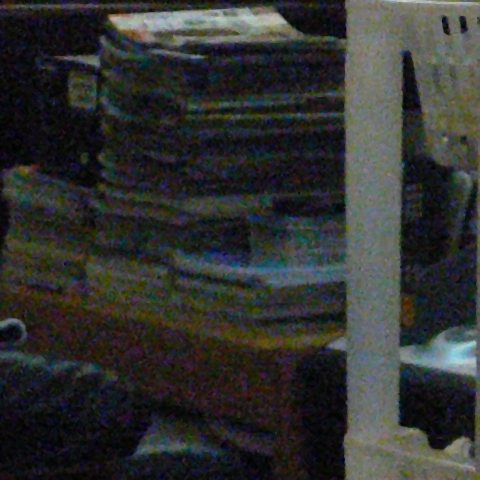

In [0]:
cv2_imshow(medianFilter(img3, rgb=True))

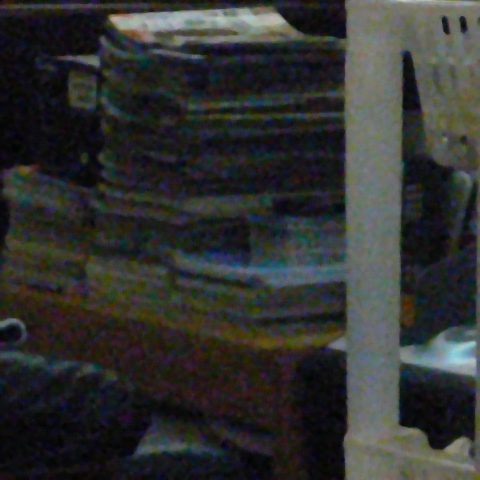

In [0]:
cv2_imshow(medianFilter(img3, r=2, rgb=True))

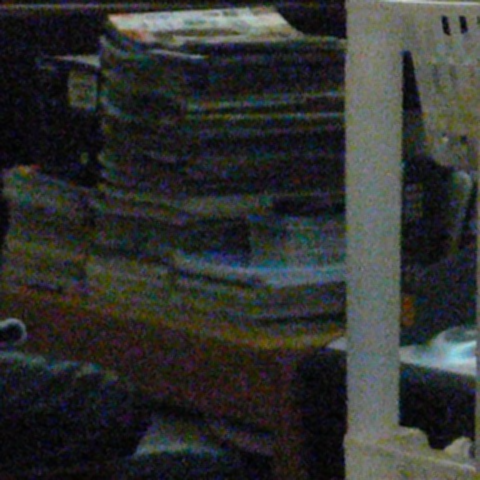

In [0]:
cv2_imshow(meanFilter(img3, rgb=True))

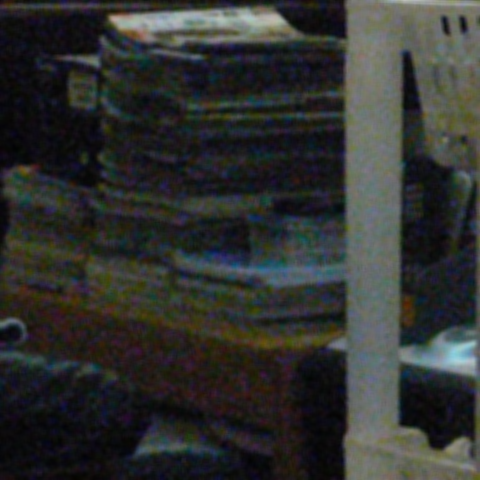

In [0]:
cv2_imshow(meanFilter(img3, r=2, rgb=True))

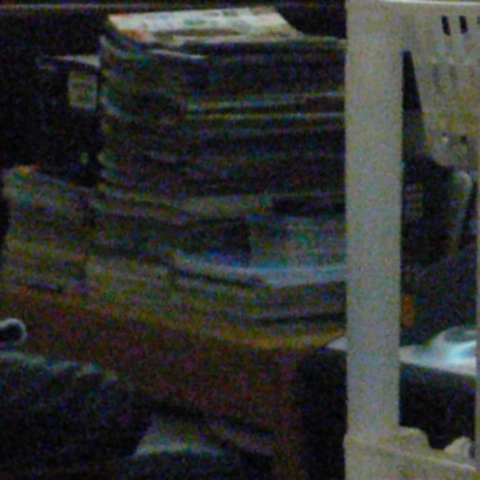

In [0]:
cv2_imshow(gaussianBlur(img3, 1., rgb=True))

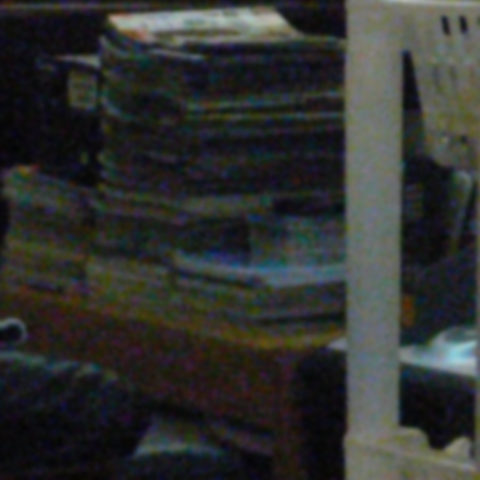

In [0]:
cv2_imshow(gaussianBlur(img3, 2., rgb=True))

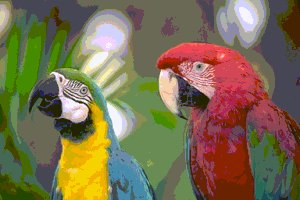

In [0]:
img4 = cv2.imread('/content/Quantization noise.jpg', cv2.IMREAD_UNCHANGED)
# Source: https://www.visgraf.impa.br/Projects/quantization/figs/ararasuni256.jpg
cv2_imshow(img4)

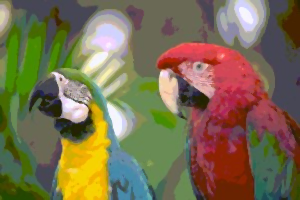

In [0]:
cv2_imshow(medianFilter(img4, rgb=True))

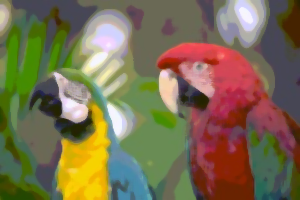

In [0]:
cv2_imshow(medianFilter(img4, r=2, rgb=True))

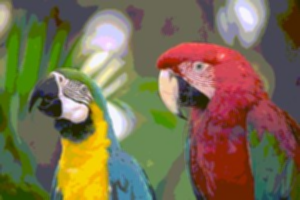

In [0]:
cv2_imshow(meanFilter(img4, rgb=True))

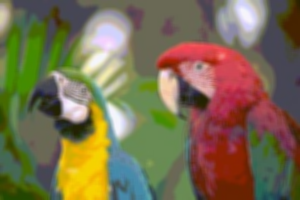

In [0]:
cv2_imshow(meanFilter(img4, r=2, rgb=True))

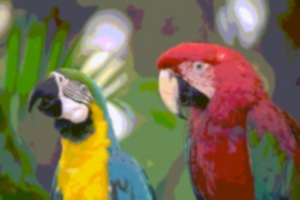

In [0]:
cv2_imshow(gaussianBlur(img4, 1., rgb=True))

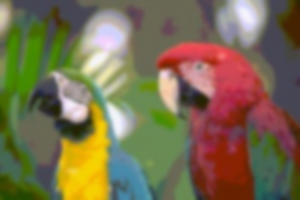

In [0]:
cv2_imshow(gaussianBlur(img4, 2., rgb=True))